In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("salida.csv")
df["NroComponentes"] = df["Filas"] * df["Columnas"] 
df.drop(["Filas", "Columnas"], axis=1, inplace=True)
df

,NroThreads,Tiempo,NroComponentes
0,1,1.490615,250000
1,1,4.418273,490000
2,1,9.427721,810000
3,1,18.249604,1210000
4,1,31.817314,1690000
...,...,...,...
145,6,1.404908,250000
146,6,4.001417,490000
147,6,8.597974,810000
148,6,16.508520,1210000


In [4]:
df_grouped = df.groupby(["NroThreads", "NroComponentes"])["Tiempo"].mean().reset_index()
df_grouped

,NroThreads,NroComponentes,Tiempo
0,1,250000,1.422005
1,1,490000,4.055595
2,1,810000,8.733619
3,1,1210000,16.333080
4,1,1690000,27.995057
5,2,250000,1.420836
6,2,490000,4.022306
7,2,810000,8.666116
8,2,1210000,16.293189
9,2,1690000,28.136955


In [5]:
dfSec = df_grouped[df_grouped["NroThreads"] == 1].copy()
dfPar = df_grouped[df_grouped["NroThreads"] != 1].copy()
dfSec
dfPar

# dfPar["Speedup"] = dfSec.loc[dfSec[["Filas", "Columnas"]] == dfPar[["Filas", "Columnas"]]]["Tiempo"] / dfPar["Tiempo"]

,NroThreads,NroComponentes,Tiempo
5,2,250000,1.420836
6,2,490000,4.022306
7,2,810000,8.666116
8,2,1210000,16.293189
9,2,1690000,28.136955
10,3,250000,1.425142
11,3,490000,3.993278
12,3,810000,8.726564
13,3,1210000,16.314488
14,3,1690000,28.290681


In [6]:
dfMerged = dfPar.merge(dfSec, how="inner", on="NroComponentes", suffixes=["_par", "_sec"])

In [7]:
dfMerged["Speedup"] = dfMerged["Tiempo_sec"] / dfMerged["Tiempo_par"]

In [8]:
dfMerged

,NroThreads_par,NroComponentes,Tiempo_par,NroThreads_sec,Tiempo_sec,Speedup
0,2,250000,1.420836,1,1.422005,1.000823
1,3,250000,1.425142,1,1.422005,0.997799
2,4,250000,1.431277,1,1.422005,0.993522
3,5,250000,1.423834,1,1.422005,0.998715
4,6,250000,1.422994,1,1.422005,0.999305
5,2,490000,4.022306,1,4.055595,1.008276
6,3,490000,3.993278,1,4.055595,1.015606
7,4,490000,4.005587,1,4.055595,1.012485
8,5,490000,4.038542,1,4.055595,1.004223
9,6,490000,4.014781,1,4.055595,1.010166


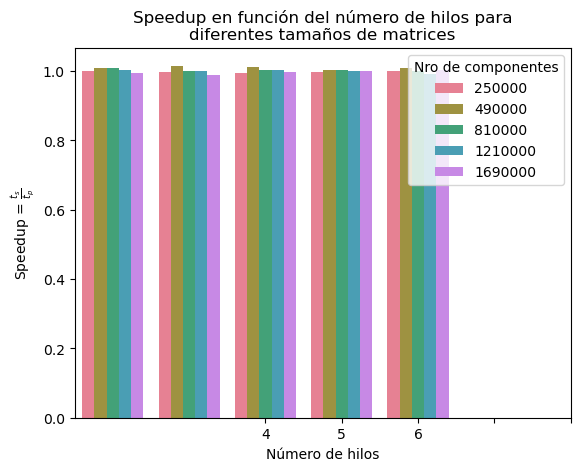

In [9]:
colores = sns.color_palette("husl", n_colors=len(dfMerged['NroComponentes'].unique()))
sns.barplot(dfMerged, x="NroThreads_par", y="Speedup", hue="NroComponentes", palette=colores)
plt.xlabel("Número de hilos")
plt.xticks(dfMerged["NroThreads_par"].unique())
plt.ylabel(r"Speedup = $\frac{t_s}{t_p}$")
plt.legend(title="Nro de componentes")
plt.title("Speedup en función del número de hilos para\ndiferentes tamaños de matrices")
plt.show()